In [1]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import numpy as np
import anndata as ad 

In [2]:
import matplotlib
import seaborn as sns

def get_colors(num):
    if num < 10:
        return sns.color_palette(palette='tab10', n_colors=num).as_hex()
    elif num < 20:
        return sns.color_palette(palette='tab20', n_colors=num).as_hex()
    else:
        return list(matplotlib.colors.cnames.values())[:num]
    
# print(get_colors(5))
# sns.palplot(sns.color_palette( get_colors(5) ))
# print(get_colors(15))
# sns.palplot(sns.color_palette( get_colors(15) ))
# print(get_colors(25))
# sns.palplot(sns.color_palette( get_colors(25) ))

['o', 's', 'p', '*', 'H', 'D', 'P', 'X', (6, 2, 0), 'v', '^', '<', '>', '8', '1', '2', '3', '4', 'd', 'h', '+', (5, 1, 90), '.', (6, 2, 90), 'x', (7, 2, 0), 'o', 's', 'p', '*']


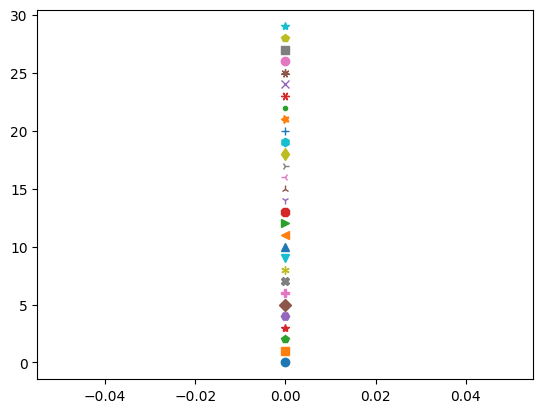

In [3]:
import matplotlib

# https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
# matplotlib.markers.items()
def get_markers(num):
    markers = ['o', 's', 'p', '*', 'H', 'D', 'P', 'X', (6, 2, 0), 'v', '^', '<', '>', '8', '1', '2', '3', '4', 'd', 'h', '+', (5, 1, 90), '.', (6, 2, 90), 'x', (7, 2, 0)]
    res = []
    while(num > len(markers)):
        res.extend(markers)
        num = num - len(markers)
        
    res.extend(markers[:num])
    return res

results = get_markers(30)
print(results)
for i in range(len(results)):
        plt.plot([i], marker=results[i])

In [4]:
def plot_aligned_3D(df, grid = True, legend=True, title="", pos = [1, 0.5],axis=True, elev=0, azim=0, roll=0, save_path=None):
    import numpy as np
    import matplotlib.pyplot as plt
    
    batchs = sorted(list(df['batch'].unique()))
    batch_marker = get_markers(len(batchs))
    marker_dict = dict(zip(batchs, batch_marker))
    celltypes = sorted(list(df['label'].unique()))
    label_color = get_colors(len(celltypes))
    label_dict = dict(zip(celltypes, label_color))
    
    # Creating figure
    fig = plt.figure(figsize = (9, 9))
    ax = plt.axes(projection ="3d")
    
    # Creating plot
    # for celltype in celltypes:
    #     df_tmp = df[df['label']==celltype]
    #     for b in batchs:
    #         df_tmp2 = df_tmp[df_tmp['batch']==b]
    #         sctt = ax.scatter3D(df_tmp2.x, df_tmp2.y, df_tmp2.z,alpha = 0.3,c = df_tmp2.color, marker =marker_dict[b])
    for b in batchs:
        df_tmp = df[df['batch']==b]
        for c in celltypes:
            df_tmp2 = df_tmp[df_tmp['label']==c]
            sctt = ax.scatter3D(df_tmp2.x, df_tmp2.y, df_tmp2.z,alpha = 0.3,c = df_tmp2.color, marker =marker_dict[b])
        
    # Add x, y gridlines   设置是否显示坐标轴
    if grid:
        ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2) 
    else:
        ax.grid(False)
        
    if legend:
        import matplotlib.patches as mpatches
        patch_list = []
        for c in celltypes:
            patch_list.append( mpatches.Patch(color=label_dict[c], label=c) )
        # for b in batchs:
        #     patch_list.append( mpatches.Patch(marker=marker_dict[b], label=b) )
        ax.legend(handles=patch_list,bbox_to_anchor=(pos[0], pos[1]), loc=7, borderaxespad=0.)


    # title
    plt.title(title)
    
    if axis:  
        ax.set_xlabel('X', fontweight ='bold') 
        ax.set_ylabel('Y', fontweight ='bold') 
        ax.set_zlabel('Z', fontweight ='bold')
    else:
        plt.axis('off')

    #设置边距
    # ax.set_xlim(xlim)
    # ax.set_ylim(ylim)
    # ax.set_zlim(30)

    # 旋转
    # elev、azim 和 roll  仰角、方位角和滚动角
    ax.view_init(elev=elev, azim=azim, roll = roll)

    if save_path is not None:
        import os
        directory = os.path.dirname(save_path)
        assert os.path.exists(directory), "check directory exist or not"
        plt.savefig(save_path, dpi=300)
    else:
        plt.show()
        
def plot_stack_with_celltype(df, pos1 = [1.15, 0.65], pos2 = [1.15, 0.2], save_path=None):
    import matplotlib.pyplot as plt
    batchs = sorted(list(df['batch'].unique()))
    batch_marker = get_markers(len(batchs))
    marker_dict = dict(zip(batchs, batch_marker))
    celltypes = sorted(list(df['label'].unique()))
    label_color = get_colors(len(celltypes))
    label_dict = dict(zip(celltypes, label_color))
    
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize = (9, 9))
    ax = fig.add_axes([0, 0.1, 0.8, 0.8])

    for b in batchs:
        df_tmp = df[df['batch']==b]
        for c in celltypes:
            df_tmp2 = df_tmp[df_tmp['label']==c]
            ax.scatter(df_tmp2.x, df_tmp2.y,alpha = 0.3,c = df_tmp2.color, marker =marker_dict[b])

        patch_list = []
        for c in celltypes:
            import matplotlib.patches as mpatches
            patch_list.append( mpatches.Patch(color=label_dict[c], label=c) )
        patch_legend = ax.legend(handles=patch_list,bbox_to_anchor=(pos1[0], pos1[1]), loc=7, borderaxespad=0.)
        ax.add_artist(patch_legend)

    scatter_list = []
    for b in batchs:
        scatt = ax.scatter([], [], c = 'black', marker = marker_dict[b], label=b)
        scatter_list.append( scatt )
    scatter_legend = ax.legend(handles=scatter_list,bbox_to_anchor=(pos2[0], pos2[1]), loc=7, borderaxespad=0.)

    plt.axis('off')
    ax.grid(False)
    
    if save_path is not None:
        import os
        directory = os.path.dirname(save_path)
        assert os.path.exists(directory), "check directory exist or not"
        plt.savefig(save_path, dpi=300)
    else:
        plt.show()
        
def plot_stack(df, save_path=None):
    import matplotlib.pyplot as plt
    batchs = sorted(list(df['batch'].unique()))
    batch_marker = get_markers(len(batchs))
    marker_dict = dict(zip(batchs, batch_marker))
    celltypes = sorted(list(df['label'].unique()))
    label_color = get_colors(len(celltypes))
    label_dict = dict(zip(celltypes, label_color))
    
    fig = plt.figure(figsize = (9, 9))
    ax = fig.add_axes([0.05, 0.1, 0.8, 0.8])
    import matplotlib.pyplot as plt
    colors = get_colors(len(batchs))
    for b in batchs:
        df_tmp = df[df['batch']==b]
        ax.scatter(df_tmp.x, df_tmp.y,alpha = 0.8,c = colors[batchs.index(b)])

    import matplotlib.lines as mlines
    scatter_list = []
    for b in batchs:
        scatt = ax.scatter([], [], c = colors[batchs.index(b)], label=b)
        scatter_list.append( scatt )
    ax.legend(handles=scatter_list,bbox_to_anchor=(1.15, 0.5), loc=7, borderaxespad=0.)

    plt.axis('off')
    
    if save_path is not None:
        import os
        directory = os.path.dirname(save_path)
        assert os.path.exists(directory), "check directory exist or not"
        plt.savefig(save_path, dpi=300)
    else:
        plt.show()

def plot_stack_pair(df, save_path=None):
    import matplotlib.pyplot as plt
    batchs = sorted(list(df['batch'].unique()))
    batch_marker = get_markers(len(batchs))
    marker_dict = dict(zip(batchs, batch_marker))
    celltypes = sorted(list(df['label'].unique()))
    label_color = get_colors(len(celltypes))
    label_dict = dict(zip(celltypes, label_color))
    
    if save_path is not None:
        import os
        directory = os.path.dirname(save_path)
        assert os.path.exists(directory), "check directory exist or not"
    else:
        plt.show()
    
    patch_list = []
    colors = get_colors(len(batchs))
    for i in range(len(batchs)):
        import matplotlib.patches as mpatches
        patch_list.append( mpatches.Patch(color=colors[i], label=batchs[i]) )

    fig = plt.figure(figsize = (9, 9))
    fig, ax = plt.subplots(2, int(len(batchs)/2))
    for i in range(len(batchs)):
        ax[int(i/2)][int(i%2)].axis('off')
        if i == len(batchs)-1:
            ax[int(i/2)][int(i%2)].legend(handles=patch_list,bbox_to_anchor=(1, 0.5), loc=7, borderaxespad=0.)
        else:
            df_tmp = df[df['batch']==batchs[i]]
            ax[int(i/2)][int(i%2)].scatter(df_tmp.x, df_tmp.y, s = 2, alpha = 1,c = colors[i])
            df_tmp = df[df['batch']==batchs[i+1]]
            ax[int(i/2)][int(i%2)].scatter(df_tmp.x, df_tmp.y, s = 2, alpha = 0.5,c = colors[i+1])
        if save_path is not None:
            plt.savefig(save_path, dpi=300)



In [7]:
input_dir = 'G:/dataset/12-sim/3batch_5celltype_align/'
adata_pre = sc.read_h5ad(input_dir + 'align_3batch_5celltype.h5ad')
print(adata_pre)

AnnData object with n_obs × n_vars = 1200 × 500
    obs: 'Unnamed: 0', 'x', 'y', 'celltype', 'batch'
    uns: 'batch_colors', 'celltype_colors', 'neighbors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'


###################################
SPIRAL
AnnData object with n_obs × n_vars = 1200 × 500
    obs: 'Unnamed: 0', 'x', 'y', 'celltype', 'batch'
    uns: 'batch_colors', 'celltype_colors', 'neighbors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'
['Cell5', 'Cell14', 'Cell16', 'Cell26', 'Cell28']
          Unnamed: 0   x   y   celltype   batch
cell                                           
Cell5              1   1   1  celltype1  batch1
Cell14             2   1   2  celltype1  batch1
Cell16             3   1   3  celltype1  batch1
Cell26             4   1   4  celltype1  batch1
Cell28             5   1   5  celltype1  batch1
...              ...  ..  ..        ...     ...
Cell1373        1196  20  16  celltype5  batch3
Cell1377        1197  20  17  celltype5  batch3
Cell1380        1198  20  18  celltype5  batch3
Cell1383        1199  20  19  celltype5  batch3
Cell1385        1200  20  20  celltype5  batch3

[1200 rows x 5 colum

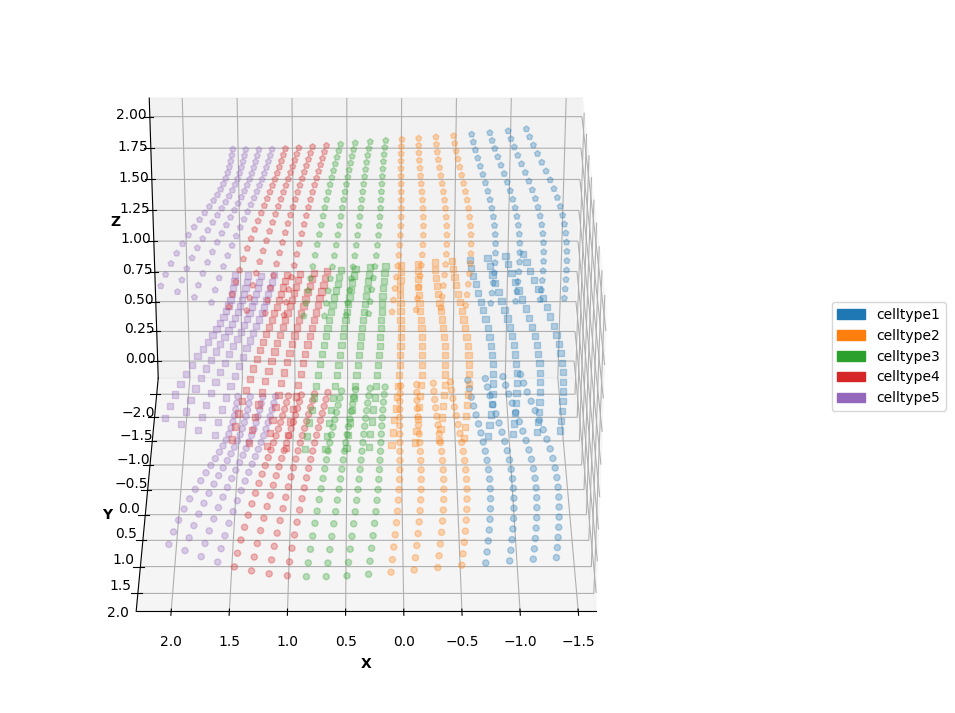

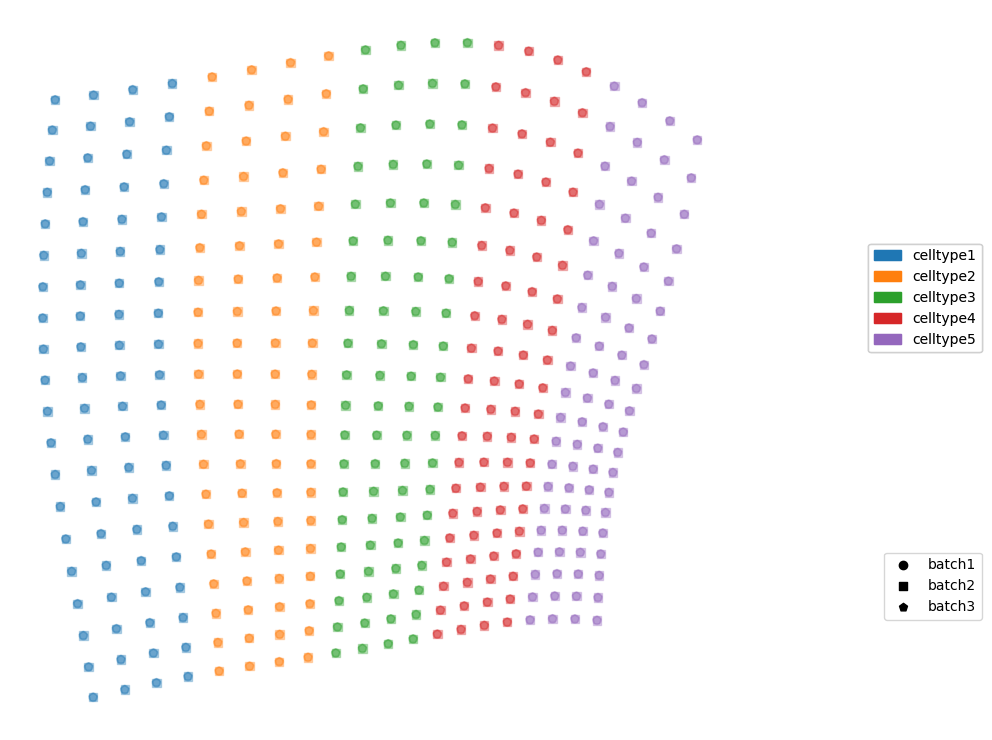

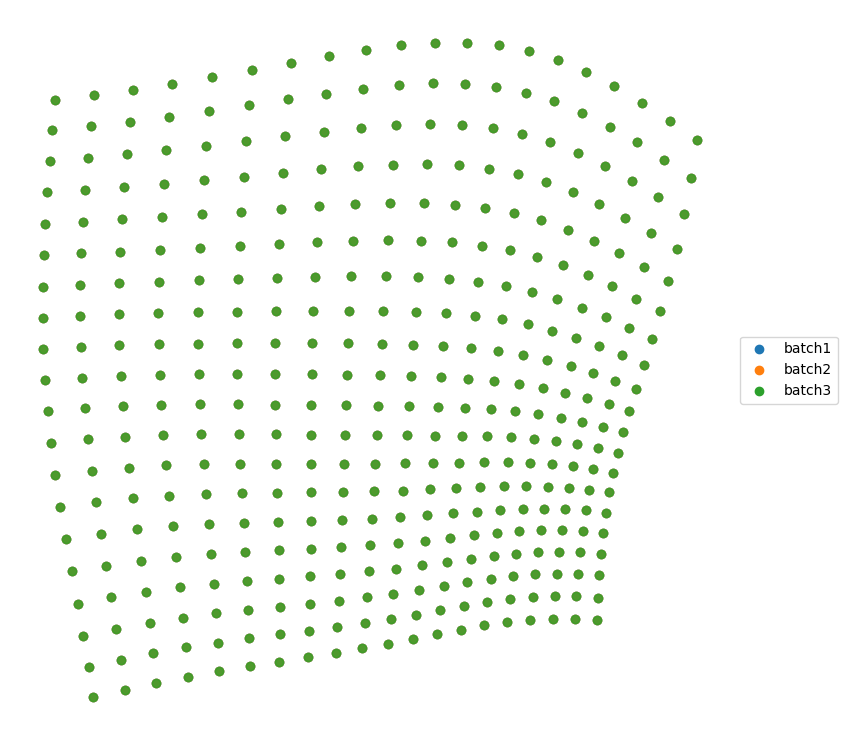

In [13]:
import scipy
def load_data_merge(file_paths, samples, verbose=True):
    adata_list = []
    for file_path in file_paths:
        adata_temp = sc.read_h5ad(file_path)
        if verbose:
            print(adata_temp)
        adata_temp.var_names_make_unique()
        adata_temp.obs_names_make_unique()
        adata_list.append(adata_temp)
    adata_pre = ad.concat(adata_list, index_unique="-", keys = samples)
#     adata_pre = ad.concat(adata_list)
    return adata_pre


def load_data_mpfc(input_dir, samples):
    adata_list = []
    for sample in samples:
        adata_temp = sc.read_h5ad(input_dir + sample + '.h5ad')
        adata_temp = adata_temp[adata_temp.obs['ClusterName']!='NA']
        adata_temp.var_names_make_unique()
        adata_temp.obs_names_make_unique()
        adata_temp.obsm['spatial'] = adata_temp.obs[['x', 'y']].values
        if sample == 'BZ5':
            adata_temp.obs['z'] = adata_temp.obs['z'] + 1
            adata_temp.obs['z'] = adata_temp.obs['z'].astype('str')
        print(adata_temp.shape)
        adata_list.append(adata_temp)
    adata_pre = ad.concat(adata_list, index_unique="-", keys = samples)
    return adata_pre


def load_MOp(input_dir, samples):
    adata_list = []
    for sample in samples:
        adata_temp = sc.read_h5ad(input_dir + 'merfish_mouse_brain_slice' + sample + '.h5ad')
        adata_temp.obs['batch'] = sample
        adata_list.append(adata_temp)
    adata_pre = ad.concat(adata_list, index_unique="-", keys = samples)
    adata_pre = ad.concat(adata_list)
    adata_pre.obsm['spatial'] = adata_pre.obsm['spatial'][['X','Y']].values
    return adata_pre

experiment = None


samples = ['batch1', 'batch2', 'batch3']
input_dir = 'G:/dataset/12-sim/3batch_5celltype_align/'
output_dir =  'G:/dataset/12-sim/3batch_5celltype_align/'
annotation = 'celltype'

# methods = ['STUtility', 'moscot_affine', 'moscot_warp', 'STalign', 'paste', 'SPACEL', 'SPIRAL']
# methods = ['moscot_affine', 'moscot_warp', 'STalign', 'paste', 'SPACEL', 'SPIRAL']
methods = ['SPIRAL']
for method in methods:
    print('###################################')
    print(method)
    adata_pre = sc.read_h5ad(input_dir + 'align_3batch_5celltype.h5ad')
    adata_pre.obsm['spatial'] = adata_pre.obsm['spatial'].astype('float')
    adata_pre.obs[annotation] = adata_pre.obs[annotation].astype("category")
    adata_pre.obs['batch'] = adata_pre.obs['batch'].astype('category')
    coord_csv = output_dir + method + '.csv'
    print(adata_pre)
    print(adata_pre.obs_names.tolist()[:5])
    if method == 'STUtility':
        STUtility_coor_pd = pd.read_csv(coord_csv, sep=",")
        print(STUtility_coor_pd.shape)
        print(STUtility_coor_pd.head())
        if adata_pre.shape[0] != STUtility_coor_pd.shape[0]:
            STUtility_coor_pd.rename(index=lambda s: s.split('_',1)[0] + '-' + samples[int(s.split('_',1)[1])-1], inplace=True)
            adatas = adata_pre[STUtility_coor_pd.index.tolist(), :]
        else:
            adatas = adata_pre
        assert adatas.shape[0] == STUtility_coor_pd.shape[0],"check shape"
        adatas.obsm['spatial_aligned'] = STUtility_coor_pd[["align_x" , "align_y" ]].values
        adatas.obsm['spatial_origin'] = STUtility_coor_pd[['x', 'y']].values
    if method == 'moscot_affine':
        moscot_coor_pd = pd.read_csv(coord_csv, index_col=0)
        print(moscot_coor_pd.shape)
        print(moscot_coor_pd.head())
        adatas = adata_pre
        assert adatas.shape[0] == moscot_coor_pd.shape[0],"check shape"
        adatas.obsm['spatial_aligned'] = moscot_coor_pd.values
        adatas.obsm['spatial_origin'] = adatas.obsm['spatial'].copy()
    if method == 'moscot_warp':
        moscot_coor_pd = pd.read_csv(coord_csv, index_col=0)
        adatas = adata_pre
        assert adatas.shape[0] == moscot_coor_pd.shape[0],"check shape"
        adatas.obsm['spatial_aligned'] = moscot_coor_pd.values
        adatas.obsm['spatial_origin'] = adatas.obsm['spatial'].copy()
    if method == 'STalign':
        adata_list = []
        for sample in samples:
            adata_temp = sc.read_h5ad(input_dir + 'merfish_mouse_brain_slice' + sample + '.h5ad')
            adata_temp.obs['batch'] = sample
#             adata_temp = adata_temp[adata_temp.obs['ClusterName']!='NA']
            adata_temp.obsm['spatial'] = adata_temp.obsm['spatial'][['X', 'Y']].values
            adata_temp.var_names_make_unique()
            adata_temp.obs_names_make_unique()
            if sample != samples[0]:
                i = samples.index(sample)
                STalign_coor_pd = pd.read_csv(output_dir + samples[i] +"_aligned_to_" + samples[i-1] + ".csv", index_col=0)
                print(STalign_coor_pd.shape)
                adata_temp.obsm['spatial_origin'] = adata_temp.obsm['spatial'].copy()
                adata_temp.obsm['spatial_aligned'] = STalign_coor_pd[['aligned_x', 'aligned_y']].values
            else:
                adata_temp.obsm['spatial_origin'] = adata_temp.obsm['spatial'].copy()
                adata_temp.obsm['spatial_aligned'] = adata_temp.obsm['spatial'].copy()
            adata_list.append(adata_temp)
        adata_pre = ad.concat(adata_list, index_unique="-", keys = samples)
        adata_pre.obs[annotation] = adata_pre.obs[annotation].astype("category")
        adata_pre.obs['batch'] = adata_pre.obs['batch'].astype('category')
        adata_pre.obsm['spatial'] = adata_pre.obsm['spatial'].astype(float)
        adatas = adata_pre
        del adata_list
        del adata_temp
    if method == 'paste':
        sc.pp.filter_genes(adata_pre, min_counts = 15)
        sc.pp.filter_cells(adata_pre, min_counts = 100)
        paste_coor_pd = pd.read_csv(coord_csv, index_col=0)
        print(paste_coor_pd.shape)
        print(paste_coor_pd.head())
        adatas = adata_pre
        assert adatas.shape[0] == paste_coor_pd.shape[0],"check shape"
        adatas.obsm['spatial_aligned'] = paste_coor_pd.values
        adatas.obsm['spatial_origin'] = adatas.obsm['spatial'].copy()
    if method == 'SPACEL':
#         adatas.obsm['spatial_aligned'] = adatas.obsm['spatial_aligned'][['X','Y']].values
#         adatas.obsm['spatial_origin'] = adatas.obsm['spatial'].copy()
        SPACEL_coor_pd = pd.read_csv(coord_csv, index_col=0)
#     #     SPACEL_coor_pd.rename(index=lambda s: s.split('_',1)[0] + '-' + samples[int(s.split('_',1)[1])-1], inplace=True)
#         print(SPACEL_coor_pd.shape)
#         print(SPACEL_coor_pd.head())
        adatas = adata_pre
        assert adatas.shape[0] == SPACEL_coor_pd.shape[0],"check shape"
        adatas.obsm['spatial_aligned'] = SPACEL_coor_pd.values
        adatas.obsm['spatial_origin'] = adatas.obsm['spatial'].copy()

    if method == 'SPIRAL':
        SPIRAL_coor_pd = pd.read_csv(coord_csv, index_col=0)
        print(adata_pre.obs)
        print(SPIRAL_coor_pd.shape)
        print(SPIRAL_coor_pd.head(-5))
#         SPIRAL_coor_pd.rename(index=lambda s: s.split('-',1)[1] + '-' + s.split('-',1)[0], inplace=True)
#         SPIRAL_coor_pd.rename(index=lambda s: s.replace('.', '-'), inplace=True)
        adata_pre.obs['aligned_x'] = SPIRAL_coor_pd['x']
        adata_pre.obs['aligned_y'] = SPIRAL_coor_pd['y']
        adatas = adata_pre
        assert adatas.shape[0] == SPIRAL_coor_pd.shape[0],"check shape"
        adatas.obsm['spatial_aligned'] = adata_pre.obs[['aligned_y', 'aligned_x']].values
#         adatas.obsm['spatial_aligned'] = SPIRAL_coor_pd[['y', 'x']].values
        adatas.obsm['spatial_origin'] = adatas.obsm['spatial'].copy()


    adatas.obsm['spatial_origin'] = adatas.obsm['spatial_origin'].astype('float')
    adatas.obsm['spatial_aligned'] = adatas.obsm['spatial_aligned'].astype('float')
    print(adatas)
        
    adatas = adatas[adatas.obs[annotation]!='']
    adatas = adatas[adatas.obs[annotation]!='na']
    adatas = adatas[adatas.obs[annotation]!='unknown']
    print(adatas)

    df = pd.DataFrame(adatas.obsm['spatial_aligned'],columns=['x','y'])
    df['label'] = adatas.obs[[annotation]].values
    df['batch'] = adatas.obs[['batch']].values

    celltypes = sorted(list(df['label'].unique()))
    label_color = get_colors(len(celltypes))
    label_dict = dict(zip(celltypes, label_color))
    df['color'] = df['label'].replace(dict(zip(celltypes, label_color)))

    batchs = sorted(list(df['batch'].unique()))
    batch_marker = get_markers(len(batchs))
    marker_dict = dict(zip(batchs, batch_marker))
    df['z'] = df['batch'].replace(dict(zip(batchs, [i for i in range(len(batchs))])))
    
    plot_aligned_3D(df, elev=30, azim=90, roll = 0, pos = [1.35, 0.5],save_path= output_dir+method+'_aligned_3D.png')
    plot_stack_with_celltype(df, pos1 = [1.35, 0.6], pos2 = [1.35, 0.2], save_path= output_dir+method+'_stack_with_celltype.png')
    plot_stack(df, save_path= output_dir+method+'_stack.png')
#     plot_stack_pair(df, save_path= output_path+method+'_stack_pair.png')

In [ ]:
plot_aligned_3D(df, elev=30, azim=0, roll = 0, pos = [1.35, 0.5],save_path= output_dir+method+'_aligned_3D.png')
# plot_stack_with_celltype(df, pos1 = [1.35, 0.6], pos2 = [1.35, 0.2], save_path= output_dir+method+'_stack_with_celltype.png')
# plot_stack(df, save_path= output_dir+method+'_stack.png')

In [ ]:
import scipy
def load_data(start,end):
    adata_list = []
    for i in range(start,end):
        input_dir = 'G:/dataset/1_DLPFC/input/'+str(i)+'/'
        adata_temp = sc.read_visium(input_dir)
        adata_temp.var_names_make_unique()
        adata_temp.obs_names_make_unique()
        adata_label = pd.read_csv(input_dir + 'truth.csv', index_col=0)
        adata_temp.obs['batch'] = adata_label['batch'].astype("category")
        adata_temp.obs['ground.truth'] = adata_label['ground.truth'].astype("category")
        adata_list.append(adata_temp)
    adata_pre = ad.concat(adata_list, index_unique="-", keys = [i for i in range(start,end)])
    return adata_pre

output_path = 'G:/dataset/1_DLPFC/output/donor3/spatial/'

method == 'STalign'
adata_list = []
for i in range(151673, 151677):
    input_dir = 'G:/dataset/1_DLPFC/input/'+str(i)+'/'
    adata_temp = sc.read_visium(input_dir)
    adata_temp.var_names_make_unique()
    adata_temp.obs_names_make_unique()
    adata_label = pd.read_csv(input_dir + 'truth.csv', index_col=0)
    adata_temp.obs['batch'] = adata_label['batch'].astype("category")
    adata_temp.obs['ground.truth'] = adata_label['ground.truth'].astype("category")
    if i != 151676:
        STalign_coor_pd = pd.read_csv('G:/dataset/1_DLPFC/output/STalign/'+str(i)+'_aligned_to_'+str(i+1)+'.csv')
        STalign_coor_pd.index = STalign_coor_pd['0']
        print(adata_temp.obs_names)
        df = pd.merge(adata_temp.obs,STalign_coor_pd,how='inner',left_index=True,right_index=True)
        print(df)
        adata_temp.obsm['spatial_origin'] = adata_temp.obsm['spatial'].copy()
        adata_temp.obsm['spatial_aligned'] = df[['aligned_y', 'aligned_x']].values
        print(adata_temp.obsm['spatial_origin'])
        print(adata_temp.obsm['spatial_aligned'])
    else:
        adata_temp.obsm['spatial_origin'] = adata_temp.obsm['spatial'].copy()
        adata_temp.obsm['spatial_aligned'] = adata_temp.obsm['spatial'].copy()
    adata_list.append(adata_temp)
adata_pre = ad.concat(adata_list, index_unique="-", keys = [i for i in range(151673, 151677)])
adatas = adata_pre
del adata_list
del adata_temp

adatas = adatas[adatas.obs['ground.truth']!='']
adatas = adatas[adatas.obs['ground.truth']!='na']
adatas = adatas[adatas.obs['ground.truth']!='unknown']
print(adatas)

df = pd.DataFrame(adatas.obsm['spatial_aligned'],columns=['x','y'])
df['label'] = adatas.obs[['ground.truth']].values
df['batch'] = adatas.obs[['batch']].values

celltypes = sorted(list(df['label'].unique()))
label_color = get_colors(len(celltypes))
label_dict = dict(zip(celltypes, label_color))
df['color'] = df['label'].replace(dict(zip(celltypes, label_color)))

batchs = sorted(list(df['batch'].unique()))
batch_marker = get_markers(len(batchs))
marker_dict = dict(zip(batchs, batch_marker))
df['z'] = df['batch'].replace(dict(zip(batchs, [i for i in range(len(batchs))])))

plot_aligned_3D(df, elev=15, azim=20, roll = 0, save_path= None)
# plot_stack_with_celltype(df, save_path= output_path+method+'_stack_with_celltype.png')
# plot_stack(df, save_path= output_path+method+'_stack.png')
# plot_stack_pair(df, save_path= output_path+method+'_stack_pair.png')

In [ ]:
import scipy
def load_data(start,end):
    adata_list = []
    for i in range(start,end):
        input_dir = 'G:/dataset/1_DLPFC/input/'+str(i)+'/'
        adata_temp = sc.read_visium(input_dir)
        adata_temp.var_names_make_unique()
        adata_temp.obs_names_make_unique()
        adata_label = pd.read_csv(input_dir + 'truth.csv', index_col=0)
        adata_temp.obs['batch'] = adata_label['batch'].astype("category")
        adata_temp.obs['ground.truth'] = adata_label['ground.truth'].astype("category")
        adata_list.append(adata_temp)
    adata_pre = ad.concat(adata_list, index_unique="-", keys = [i for i in range(start,end)])
    return adata_pre

adata_pre = load_data(151673, 151677)
STUtility_coor_pd = pd.read_csv("G:/dataset/1_DLPFC/output/STUtility/Donor3-STutil-coords.csv", sep=" ")
STUtility_coord_list = []
STUtility_coor_pd.rename(index=lambda s: s.split('_',1)[0] + '-' + str(int(s.split('_',1)[1]) + 151672), inplace=True)
adatas = adata_pre[STUtility_coor_pd.index.tolist(), :]
adatas.obsm['spatial_aligned'] = STUtility_coor_pd[['align_x', 'align_y']].values
adatas.obsm['spatial_origin'] = STUtility_coor_pd[['x', 'y']].values
        
adatas = adatas[adatas.obs['ground.truth']!='']
adatas = adatas[adatas.obs['ground.truth']!='na']
adatas = adatas[adatas.obs['ground.truth']!='unknown']
print(adatas)

df = pd.DataFrame(adatas.obsm['spatial'],columns=['x','y'])
df['label'] = adatas.obs[['ground.truth']].values
df['batch'] = adatas.obs[['batch']].values

celltypes = list(df['label'].unique())
label_color = get_colors(len(celltypes))
label_dict = dict(zip(celltypes, label_color))
df['color'] = df['label'].replace(dict(zip(celltypes, label_color)))

batchs = list(df['batch'].unique())
batch_marker = get_markers(len(batchs))
marker_dict = dict(zip(batchs, batch_marker))
df['z'] = df['batch'].replace(dict(zip(batchs, [i for i in range(len(batchs))])))

In [ ]:
plot_aligned_3D(df, elev=15, azim=20, roll = 0, save_path='G:/dataset/1_DLPFC/output/donor1/test1.png')
# plot_stack_with_celltype(df, save_path='G:/dataset/1_DLPFC/output/donor1/test2.png')
# plot_stack(df, save_path='G:/dataset/1_DLPFC/output/donor1/test3.png')
# plot_stack_pair(df, save_path='G:/dataset/1_DLPFC/output/donor1/test4.png')

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(adatas.obsm['spatial'],columns=['x','y'])
df['label'] = adatas.obs[['ground.truth']].values
df['batch'] = adatas.obs[['batch']].values

celltypes = list(df['label'].unique())
label_color = get_colors(len(celltypes))
label_dict = dict(zip(celltypes, label_color))
df['color'] = df['label'].replace(dict(zip(celltypes, label_color)))

batchs = list(df['batch'].unique())
batch_marker = get_markers(len(batchs))
marker_dict = dict(zip(batchs, batch_marker))
df['z'] = df['batch'].replace(dict(zip(batchs, [i for i in range(len(batch))])))

# Creating figure
fig = plt.figure(figsize = (10, 9))
ax = plt.axes(projection ="3d")

# Creating color map
# my_cmap = plt.get_cmap('hsv')
 
# Creating plot
# sctt = ax.scatter3D(x, y, z,
# 					alpha = 0.8,
# 					c = (x + y + z), 
# 					cmap = my_cmap, 
# 					marker ='^')

# for celltype in celltypes:
#     df_tmp = df[df['label']==celltype]
#     for b in batchs:
#         df_tmp2 = df_tmp[df_tmp['batch']==b]
#         sctt = ax.scatter3D(df_tmp2.x, df_tmp2.y, df_tmp2.z,alpha = 0.3,c = df_tmp2.color, marker =marker_dict[b])

for b in batchs:
    df_tmp = df[df['batch']==b]
    for c in celltypes:
        df_tmp2 = df_tmp[df_tmp['label']==c]
        sctt = ax.scatter3D(df_tmp2.x, df_tmp2.y, df_tmp2.z,alpha = 0.3,c = df_tmp2.color, marker =marker_dict[b])
#         break
        
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
		linestyle ='-.', linewidth = 0.3, 
		alpha = 0.2)  
# ax.grid(False)

import matplotlib.patches as mpatches
patch_list = []
for c in celltypes:
    patch_list.append( mpatches.Patch(color=label_dict[c], label=c) )
# for b in batchs:
#     patch_list.append( mpatches.Patch(marker=marker_dict[b], label=b) )
ax.legend(handles=patch_list,bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.)

plt.title("simple 3D scatter plot")

#设置是否显示坐标轴
ax.set_xlabel('X', fontweight ='bold') 
ax.set_ylabel('Y', fontweight ='bold') 
ax.set_zlabel('Z', fontweight ='bold')
# plt.axis('off')

#设置边距
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.set_zlim(30)

# 旋转
# elev、azim 和 roll  仰角、方位角和滚动角
ax.view_init(elev=15, azim=20, roll = 0)

    
# show plot
plt.show()
# plt.savefig(r'G:\dataset\1_DLPFC\output\donor1\test.png', dpi=300)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 9))
ax = plt.axes()

for b in batchs:
    df_tmp = df[df['batch']==b]
    for c in celltypes:
        df_tmp2 = df_tmp[df_tmp['label']==c]
        ax.scatter(df_tmp2.x, df_tmp2.y,alpha = 0.3,c = df_tmp2.color, marker =marker_dict[b])

patch_list = []
for c in celltypes:
    import matplotlib.patches as mpatches
    patch_list.append( mpatches.Patch(color=label_dict[c], label=c) )
patch_legend = ax.legend(handles=patch_list,bbox_to_anchor=(1.1, 0.65), loc=7, borderaxespad=0.)
ax.add_artist(patch_legend)

scatter_list = []
for b in batchs:
    scatt = ax.scatter([], [], c = 'black', marker = marker_dict[b], label='b')
    scatter_list.append( scatt )
scatter_legend = ax.legend(handles=scatter_list,bbox_to_anchor=(1.05, 0.4), loc=7, borderaxespad=0.)

plt.axis('off')
ax.grid(False)

# plt.show()
plt.savefig(r'G:\dataset\1_DLPFC\output\donor1\test.png', dpi=300)

In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(7,7))
# for i in range(len(new_slices)):
#     pst.plot_slice(new_slices[i],slice_colors[i],s=400)
# plt.legend(handles=[mpatches.Patch(color=slice_colors[0], label='1'),mpatches.Patch(color=slice_colors[1], label='2'),mpatches.Patch(color=slice_colors[2], label='3'),mpatches.Patch(color=slice_colors[3], label='4'),mpatches.Patch(color=slice_colors[4], label='5'),mpatches.Patch(color=slice_colors[5], label='6')])
# plt.gca().invert_yaxis()
# plt.axis('off')
# plt.show()

fig = plt.figure(figsize = (10, 9))
ax = plt.axes()
import matplotlib.pyplot as plt
colors = get_colors(len(batchs))
alpha = 0.5
for b in batchs:
    df_tmp = df[df['batch']==b]
    ax.scatter(df_tmp.x, df_tmp.y,alpha = alpha,c = colors[batchs.index(b)])
    alpha = alpha - 0.1

import matplotlib.lines as mlines
scatter_list = []
for b in batchs:
    scatt = ax.scatter([], [], c = colors[batchs.index(b)], label=b)
    scatter_list.append( scatt )
ax.legend(handles=scatter_list,bbox_to_anchor=(1.15, 0.5), loc=7, borderaxespad=0.)

plt.axis('off')
plt.show()


In [ ]:
colors = get_colors(len(batchs))


patch_list = []
for i in range(len(batchs)):
    import matplotlib.patches as mpatches
    patch_list.append( mpatches.Patch(color=colors[i], label=batchs[i]) )

fig = plt.figure(figsize = (10, 9))
fig, ax = plt.subplots(2, int(len(batchs)/2))
for i in range(len(batchs)):
    ax[int(i/2)][int(i%2)].axis('off')
    if i == len(batchs)-1:
        ax[int(i/2)][int(i%2)].legend(handles=patch_list,bbox_to_anchor=(1, 0.5), loc=7, borderaxespad=0.)
    else:
        df_tmp = df[df['batch']==batchs[i]]
        ax[int(i/2)][int(i%2)].scatter(df_tmp.x, df_tmp.y, s = 2, alpha = 1,c = colors[i])
        df_tmp = df[df['batch']==batchs[i+1]]
        ax[int(i/2)][int(i%2)].scatter(df_tmp.x, df_tmp.y, s = 2, alpha = 0.5,c = colors[i+1])
    plt.savefig('G:/dataset/1_DLPFC/output/donor1/test4.png')

# fig.savefig('G:/dataset/1_DLPFC/output/donor1/test4.png')

In [ ]:
adata = sc.read_h5ad(r'G:\dataset\05-LICA\output\result\embedding\k4\DeepST\DeepST_integrated.h5ad')
# adata.obs['leiden_DeepST']

In [ ]:
deepst = adata[adata.obs['leiden_DeepST'] == '3'].obs_names.tolist()

In [ ]:
truth = adata[adata.obs['region'] == 'Immune'].obs_names.tolist()

In [ ]:
adata[adata.obs['leiden_DeepST'] == '3'].obsm['spatial']

In [ ]:
adata[adata.obs['region'] == 'Immune'].obsm['spatial']

In [ ]:
count = 0
for i in deepst:
    if i in truth:
        print(i)
        count = count + 1
print(count)

In [ ]:
sc.pl.spatial(adata[adata.obs['region'] == 'Immune'], color=["region"], spot_size = 100)
sc.pl.spatial(adata[adata.obs['leiden_DeepST'] == '3'], color=["leiden_DeepST"], spot_size = 100)

In [ ]:
adata = sc.read_h5ad(r'G:\dataset\05-LICA\output\result\embedding\k4\DeepST\DeepST_HCC-5A.h5ad')
adata
sc.pl.spatial(adata, color=["region", "leiden_DeepST"], spot_size = 100)

In [ ]:
adata = sc.read_h5ad(r'G:\dataset\05-LICA\output\result\embedding\k4\DeepST\DeepST_HCC-5B.h5ad')
adata
sc.pl.spatial(adata, color=["region", "leiden_DeepST"], spot_size = 100)

In [ ]:
adata = sc.read_h5ad(r'G:\dataset\05-LICA\output\result\embedding\k4\DeepST\DeepST_HCC-5C.h5ad')
adata
sc.pl.spatial(adata, color=["region", "leiden_DeepST"], spot_size = 100)

In [ ]:
adata = sc.read_h5ad(r'G:\dataset\05-LICA\output\result\embedding\k4\DeepST\DeepST_HCC-5D.h5ad')
adata
sc.pl.spatial(adata, color=["region", "leiden_DeepST"], spot_size = 100)